# Advanced Regression Assignment

# Load the Data Set
First I will load the dataset

# Importing Libraries

In [1]:
# for Analysis Importing the required libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

In [2]:
# Creating the  class color for the setting print formatting
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

# Data Understanding

In [3]:
#Read the data and creating the dataframe
house_data = pd.read_csv('train (1).csv')

In [4]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data.shape

(1460, 81)

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
house_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [9]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Observation: In the data frame 1460 rows and 81 columns in these 81 columns includes of both dimensions (categorical value) and measures (numeric value) This dataset is not cleaned, it consists of missing values as well.

# Data Preparation - Missing value treatment

In [11]:
#Checking the number of missing values and its percentage
Total_missing = house_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*house_data.isnull().sum()/house_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [12]:
# Checking how many columns have more than 45% of missing data

print(color.BOLD+ color.BLUE+'Total no of columns with missing values more than 45% : {}'.format(df_missing_values[df_missing_values['Percent_missing_values'] >= 45].shape[0])+ color.END)

Total no of columns with missing values more than 45% : 5


We are chosing to drop these 5 columns which have more than 45% of the missing data.

In [13]:
#Create a new dataframe named df_cleaned with all columns with data missing < 45% for our  further analysis

df_cleaned = house_data.loc[:,(100*house_data.isnull().sum()/house_data.shape[0]).sort_values(ascending = False) < 45]
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Imputing other missing values columns

In [14]:
#Checking the no of unique values in each column
df_cleaned.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [15]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
___________________________________________________
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________________________
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________________________________
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
63.0      17
79.0      17
55.0      17
72.0      17
100.0     16
51.0      15
74.0      15
66.0      15
52.0      14
59.0      13
71.0      12
82.0      12
57.0      12
67.0      12
43.0      12
40.0      12
76

DATA IMPUTATION FOR CATEGORICAL COLUMNS

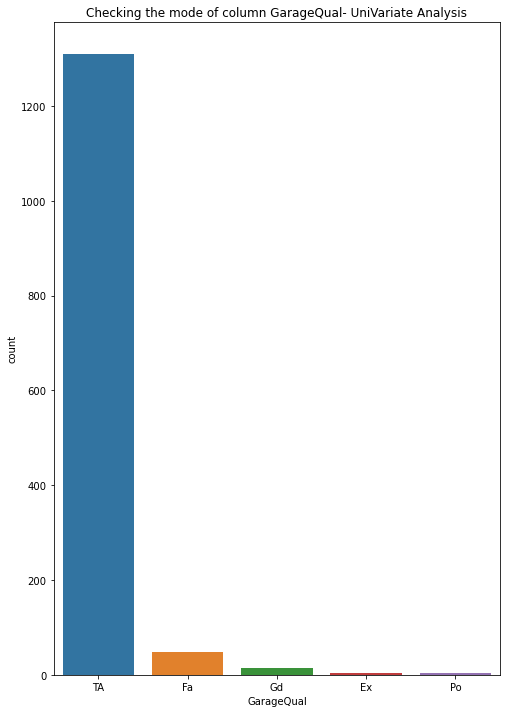

In [16]:
# Data imputation for column 'GarageQual'

plt.figure(figsize=(8,12))
sns.countplot(df_cleaned.GarageQual)
plt.title("Checking the mode of column GarageQual- UniVariate Analysis")
plt.show()

In [17]:
df_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [18]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].replace(np.nan,'TA')


In [19]:
df_cleaned['GarageQual'].dtype

dtype('O')

In [20]:
df_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

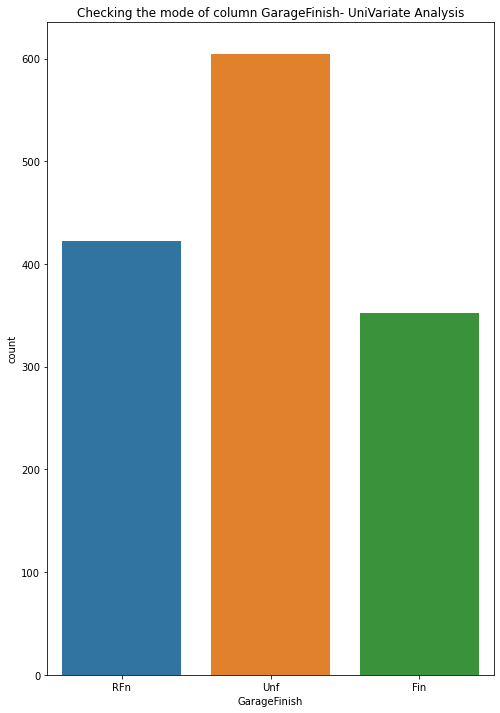

In [21]:
# Data imputation for column 'GarageFinish'

plt.figure(figsize=(8,12))
sns.countplot(df_cleaned.GarageFinish)
plt.title("Checking the mode of column GarageFinish- UniVariate Analysis")
plt.show()

In [22]:
df_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown

In [23]:
df_cleaned['GarageFinish']=df_cleaned['GarageFinish'].replace(np.nan,'Unknown')

In [24]:
df_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

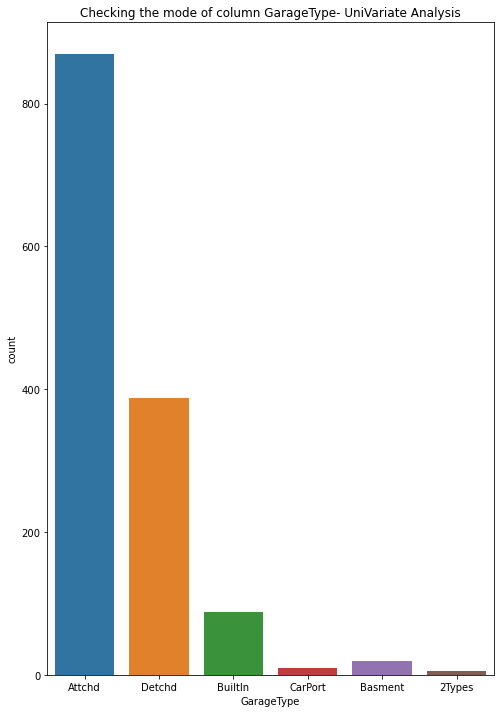

In [25]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,12))
sns.countplot(df_cleaned.GarageType)
plt.title("Checking the mode of column GarageType- UniVariate Analysis")
plt.show()

In [26]:
df_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
df_cleaned['GarageType'] = df_cleaned['GarageType'].replace(np.nan,'Attchd')

In [28]:
df_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

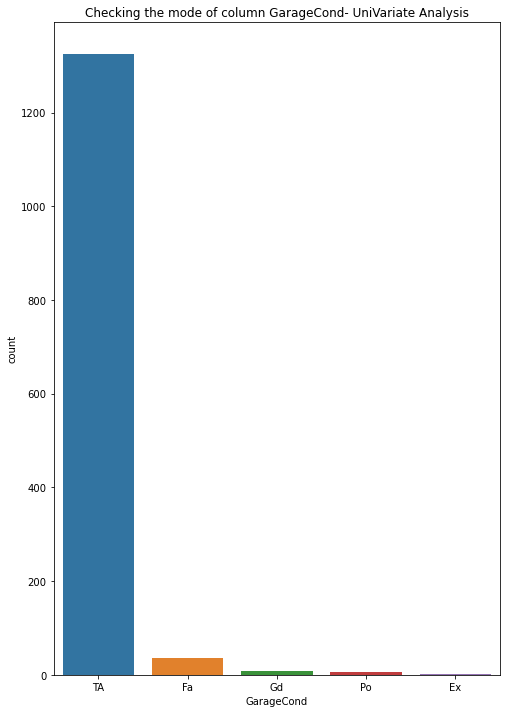

In [29]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(df_cleaned.GarageCond)
plt.title("Checking the mode of column GarageCond- UniVariate Analysis")
plt.show()

In [30]:
df_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [31]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].replace(np.nan,'TA')

In [32]:
df_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

# DATA IMPUTATION FOR NUMERICAL COLUMNS¶

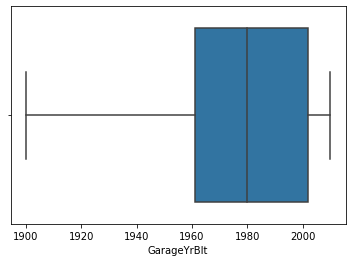

In [33]:
#PLots for outlier analysis of GarageYrBlt
sns.boxplot(df_cleaned.GarageYrBlt)
plt.show()

In [34]:
df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].mean(),inplace=True)

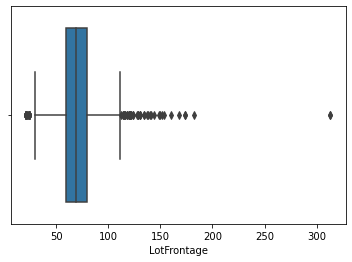

In [35]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(df_cleaned.LotFrontage)
plt.show()

In [36]:
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(),inplace=True)

In [37]:
# As the other columns have less than 3% of Nan Values we chose to drop those rows .

df_cleaned.dropna(inplace=True)

In [38]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Id,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
BsmtHalfBath,0,0.0


All missing values are handled!!!

# Data Exploration - Exploratory data analysis

In [39]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [40]:
df_cleaned['Age']=df_cleaned['YrSold']-df_cleaned['YearRemodAdd']
df_cleaned['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [41]:
df_cleaned=df_cleaned.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [42]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


Dropping the id as it does not give any infomration

In [43]:
df_cleaned=df_cleaned.drop(['Id'], axis = 1) 

Numerical columns of our data set¶

In [44]:
numeric_feats = df_cleaned.dtypes[df_cleaned.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

Univariate analysis of numerical columns

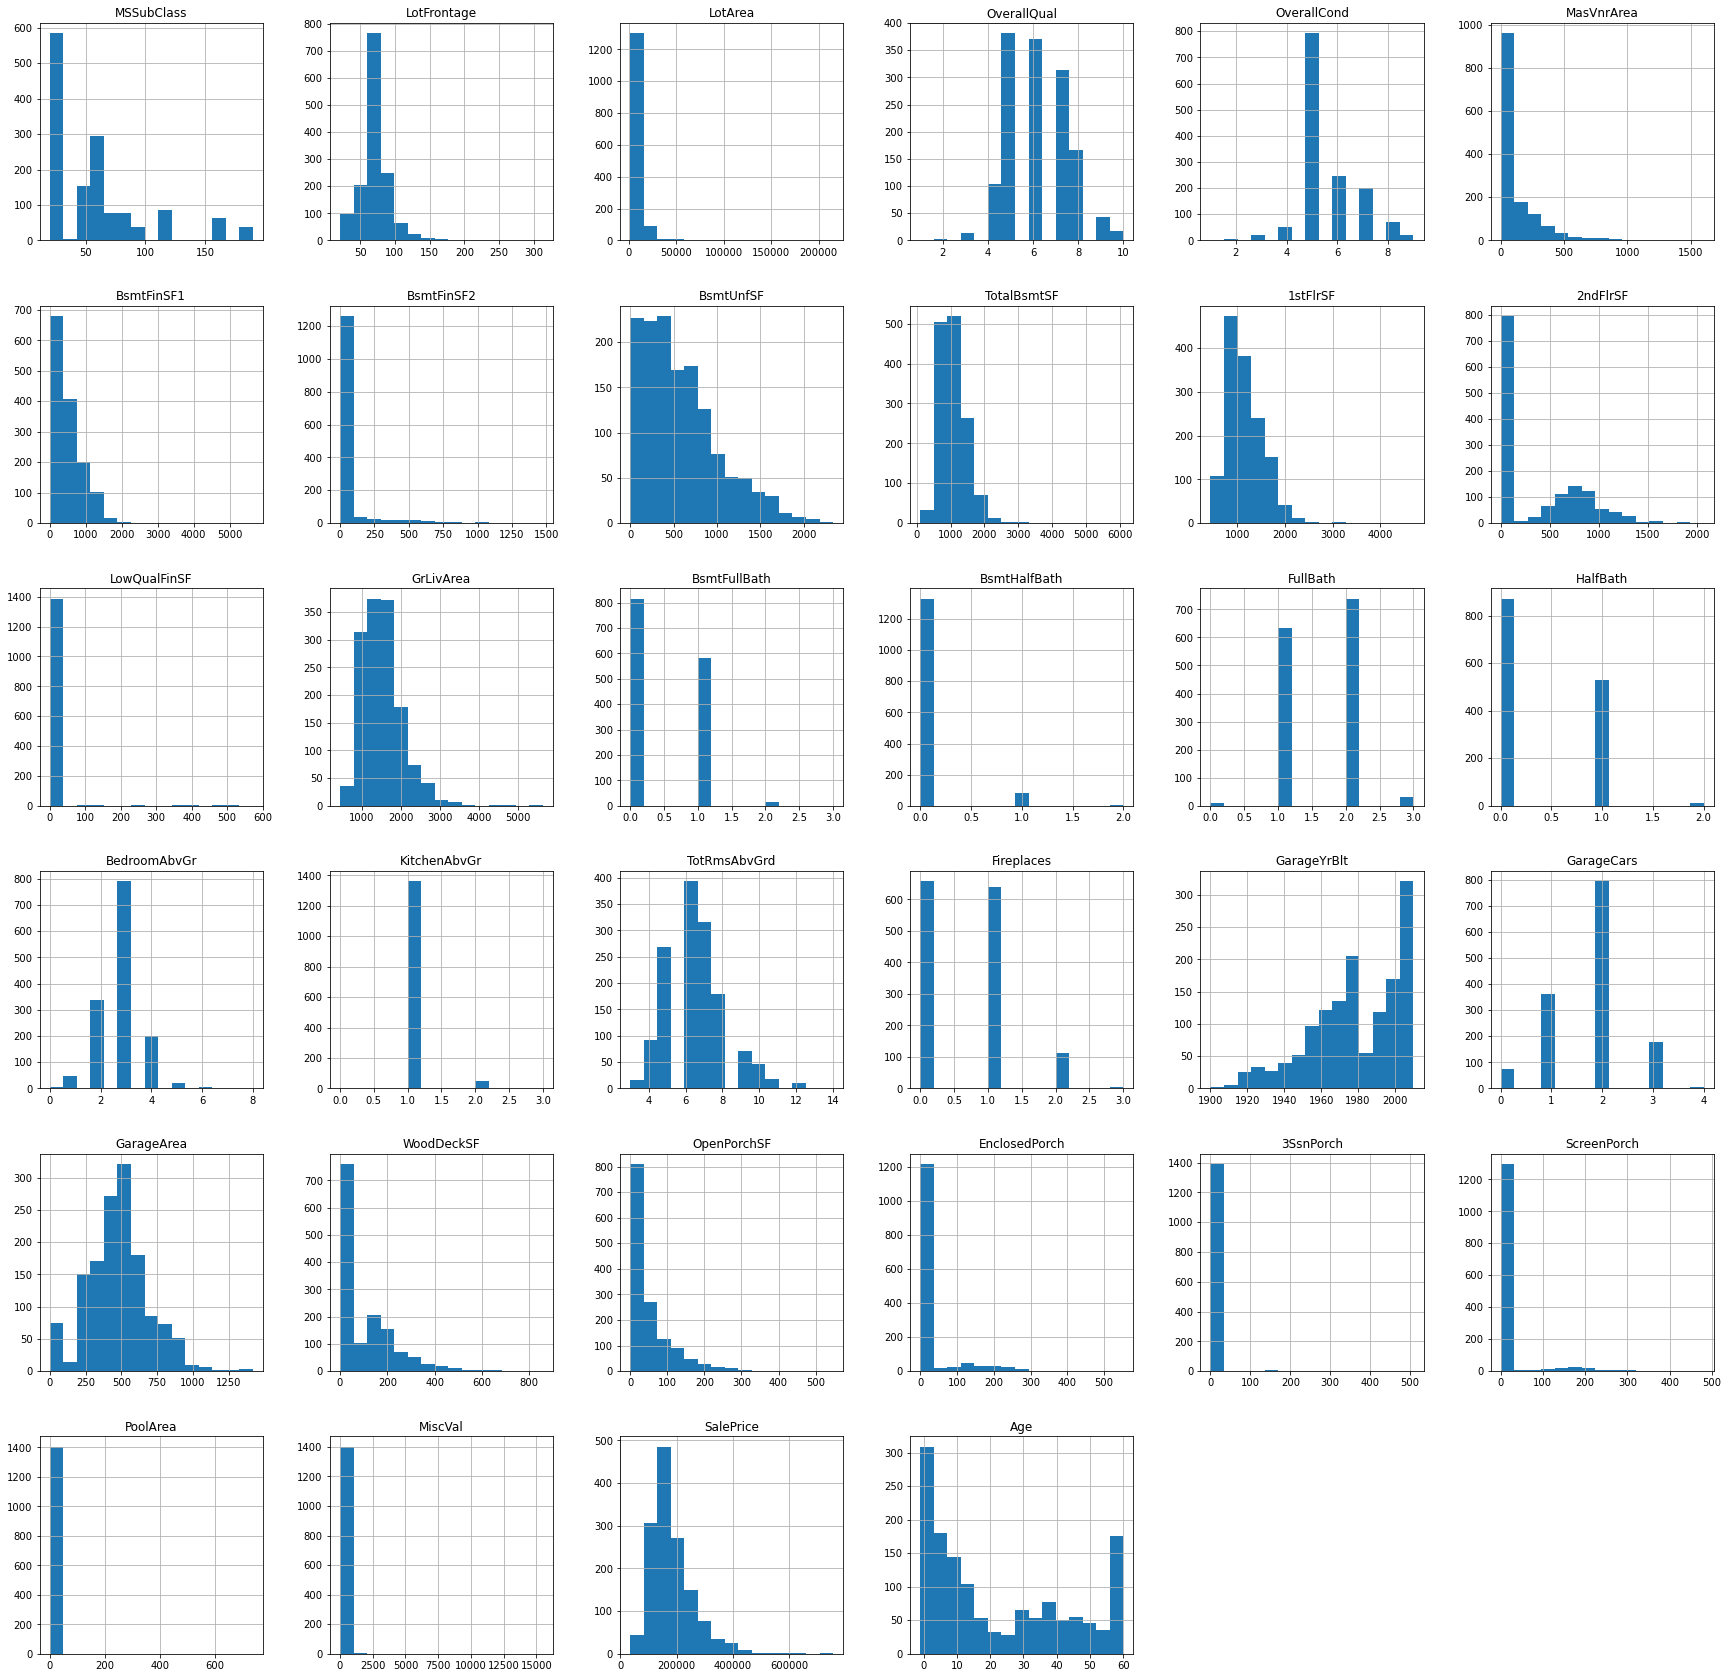

In [45]:
df_cleaned[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

We see that few variables are highly skewed and there might be possiblity that they can be coralted with each other as well which is This is very difficlut to interpret from univairate analysis.

In [46]:
# correlation matrix
cor = df_cleaned.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


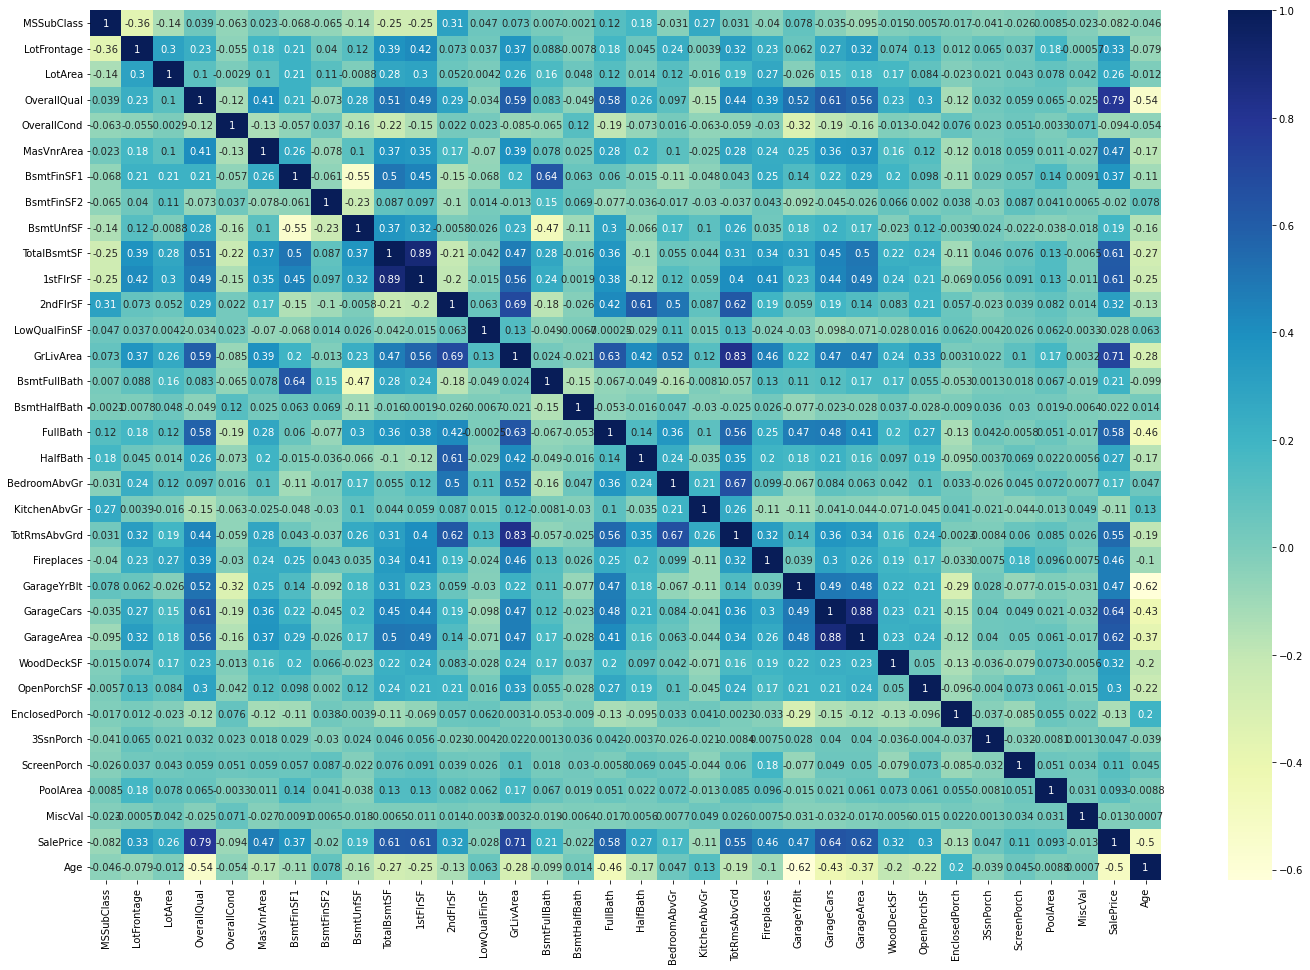

In [47]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Inferences: Based on the correlation we can make few following interpretions

SalePrice is very high positively correlated to the Overall Quality(0.79)
SalePrice is very high positively correlated to the 1stFlrSF (0.61)
SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
SalePrice is very high positively correlated to the GrLivArea (0.71)
SalePrice is very high positively correlated to the FullBath(0.58)
SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
SalePrice is very high positively correlated to the GarageCars(0.64)
SalePrice is very high positively correlated to the GarageAre(0.62)
SalePrice is very high negatively correlated to the Age(-0.5)

The above variables are top ten correlated.

Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

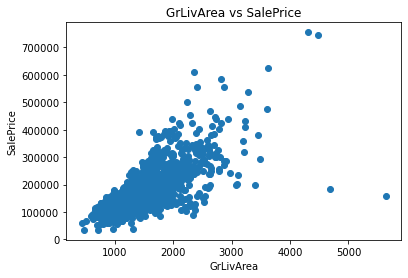

In [48]:
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

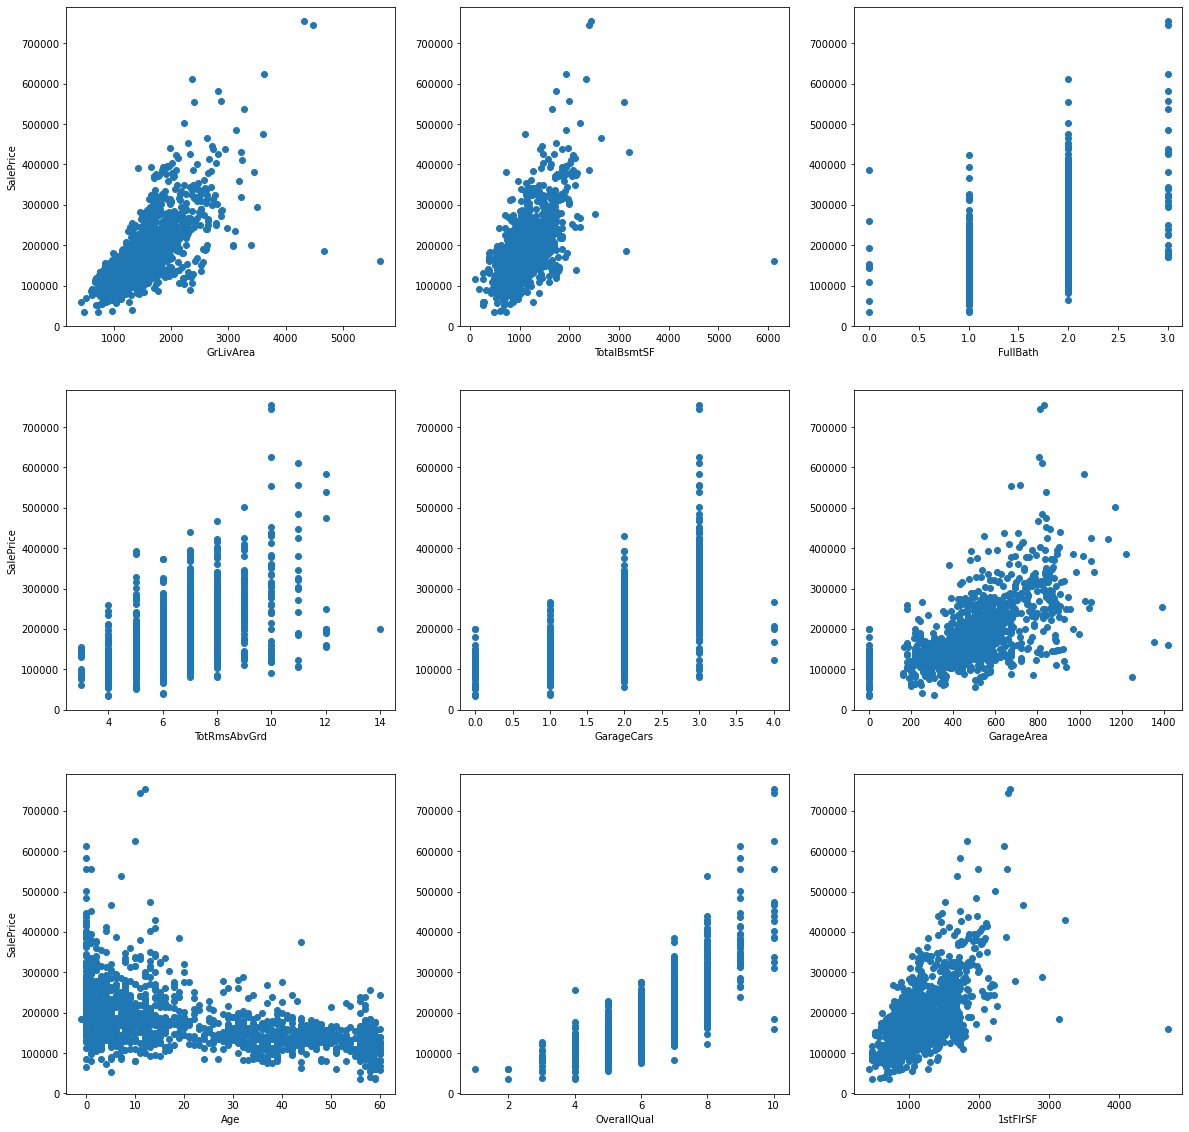

In [49]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df_cleaned.GrLivArea, df_cleaned.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(df_cleaned.TotalBsmtSF, df_cleaned.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(df_cleaned.FullBath, df_cleaned.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(df_cleaned.TotRmsAbvGrd, df_cleaned.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(df_cleaned.GarageCars, df_cleaned.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df_cleaned.GarageArea, df_cleaned.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(df_cleaned.Age, df_cleaned.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(df_cleaned.OverallQual, df_cleaned.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(df_cleaned['1stFlrSF'], df_cleaned.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()


Inferences :

We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to theie characteritics.

Categorical columns of our data set

In [50]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

EDA FOR few categorical columns- the columns which might be useful predicting the sale price(based on my understanding my business understanding and meta data)

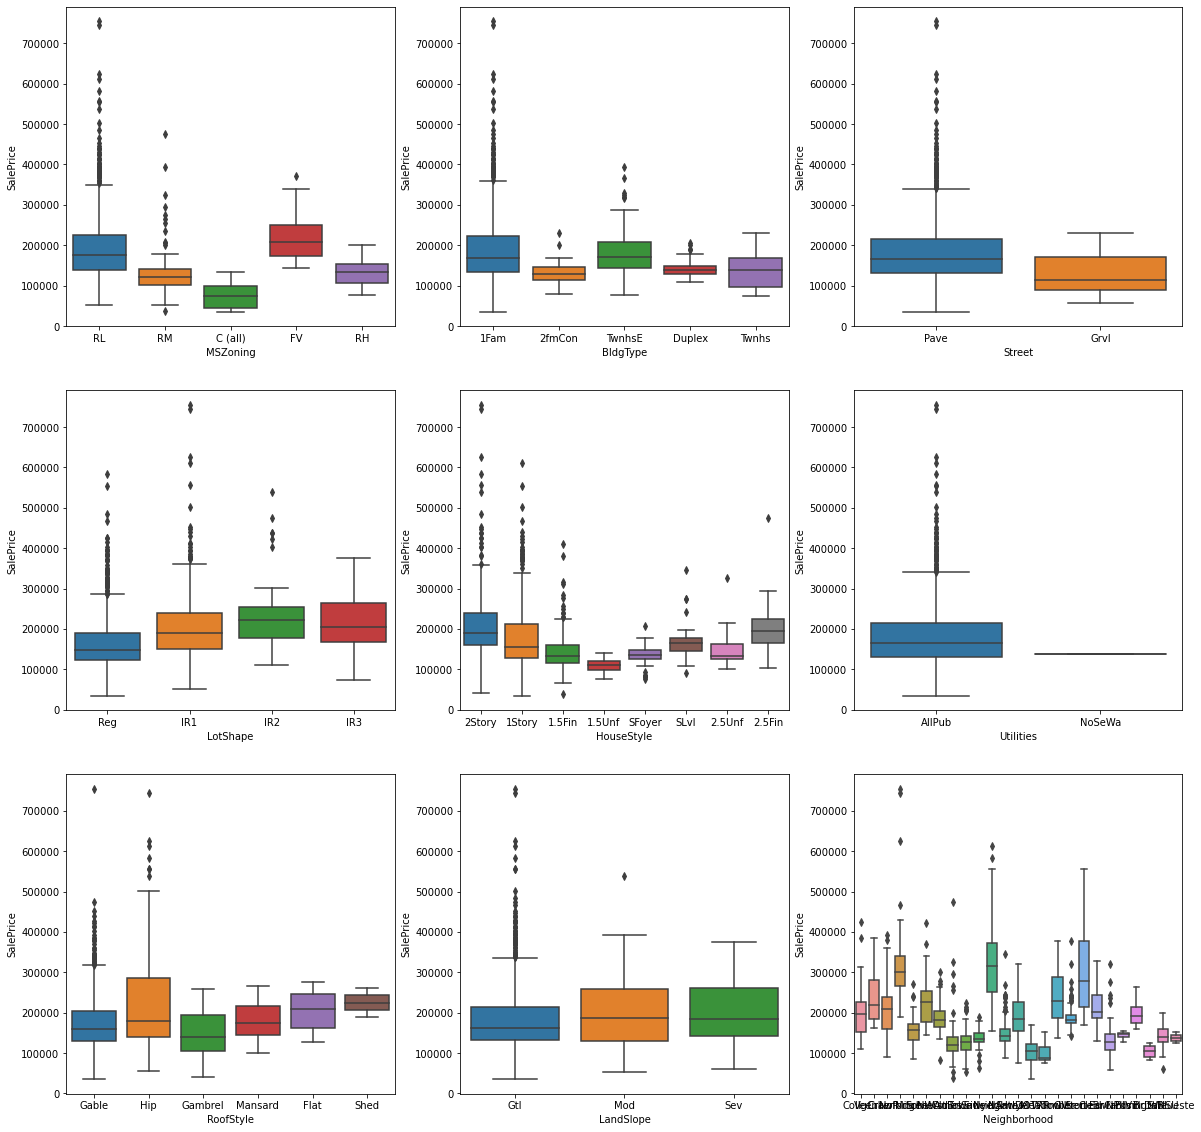

In [51]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df_cleaned)
plt.show()

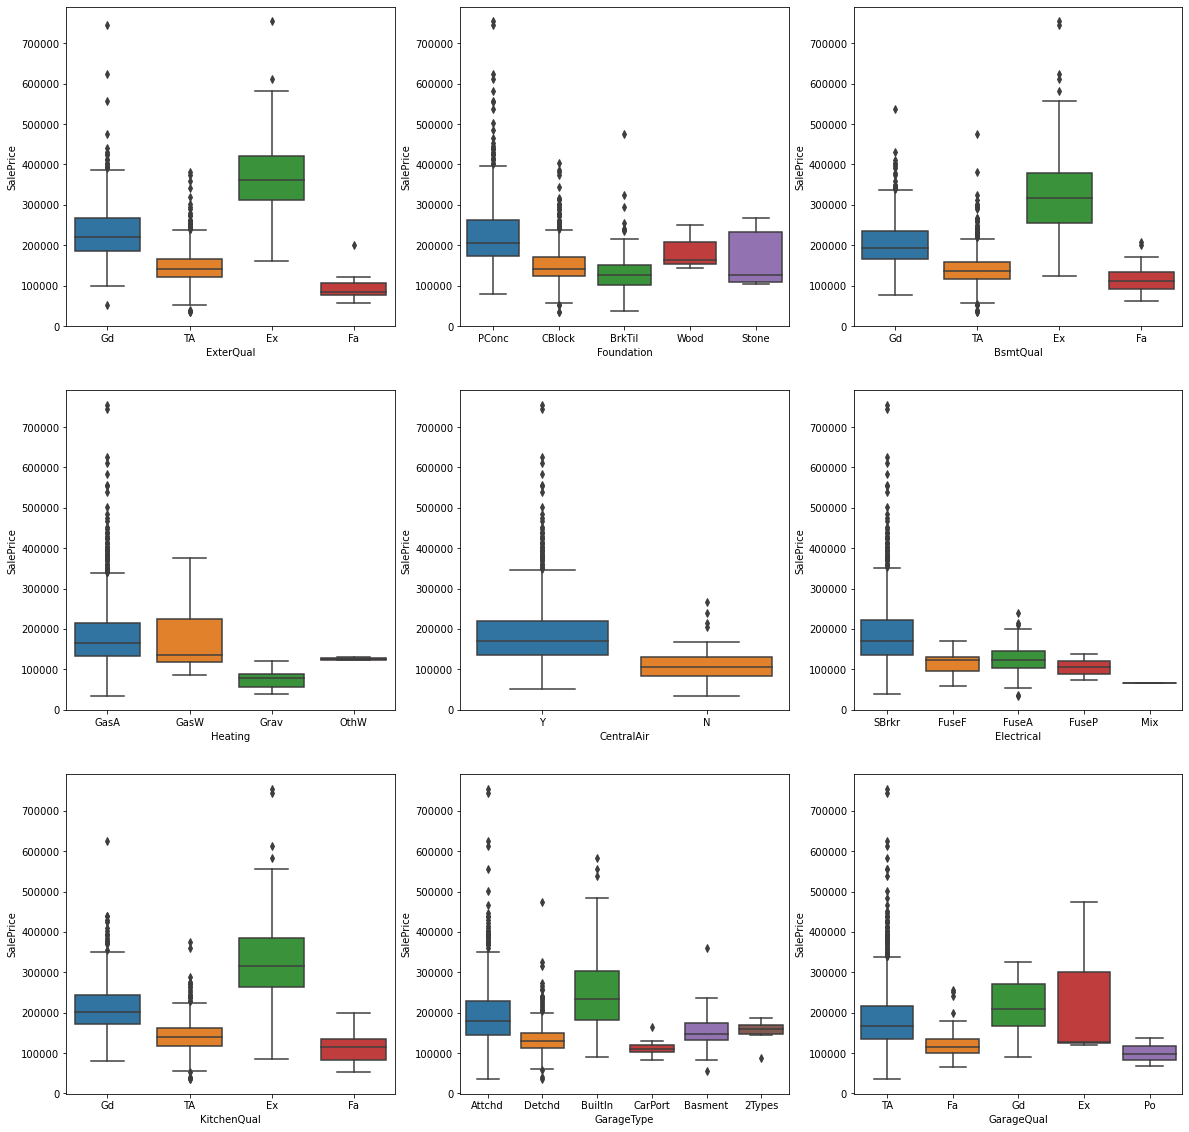

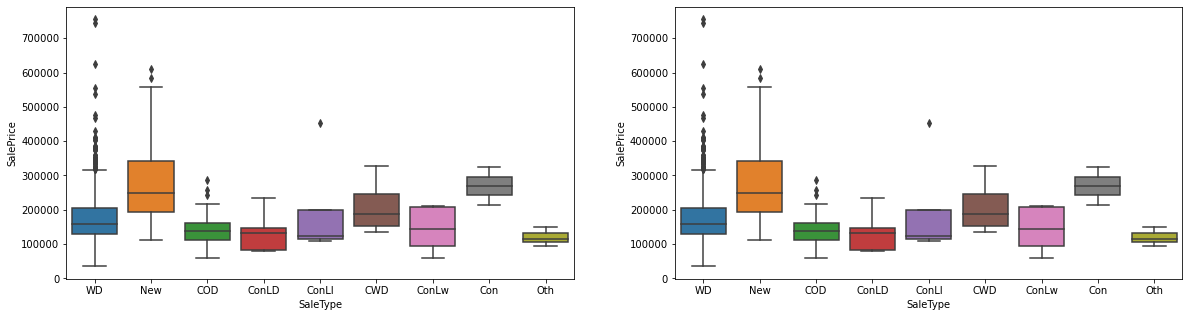

In [52]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df_cleaned)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df_cleaned)
plt.show()

Inferences -

MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
The house with Exterior Quality of type Execellent has the highest SalePrice.
The house with Basement Quality of type Execellent has the highest SalePrice.
The house with Kitchen Quality of type Execellent has the highest SalePrice.
The house with Garage Quality of type Execellent has the highest SalePrice.
The house with Garage Type of type BuiltIn has the highest SalePrice.
The house with Sale Type of type New has the highest SalePrice.
The Central air of type 'Yes' has more Sale Price when compared to 'No'

# Data Preprocessing - Tranforming the Target variable(SalePrice)

Target variable

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [53]:
df_cleaned['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

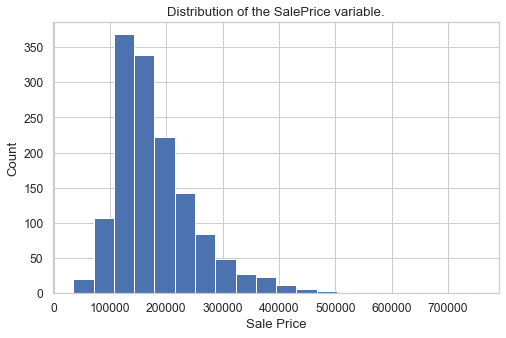

In [54]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_cleaned['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 182507.02 and sigma = 79242.34



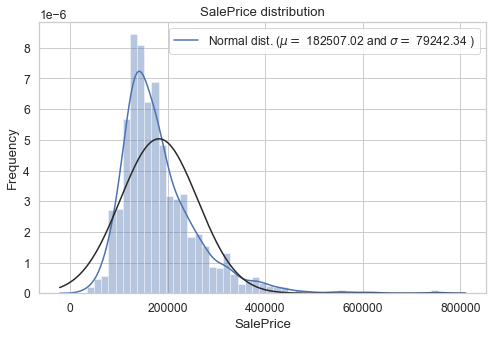

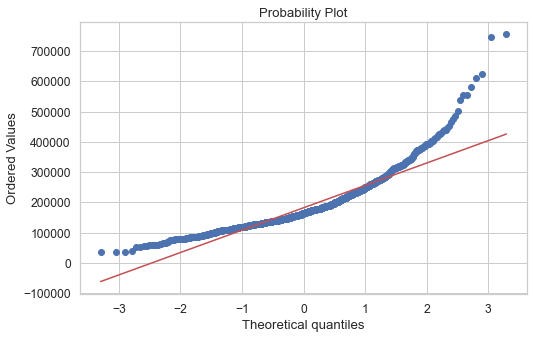

In [55]:
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it normally distributed so using log tranformation method

### Log-transformation of the target variable


 mu = 12.03 and sigma = 0.39



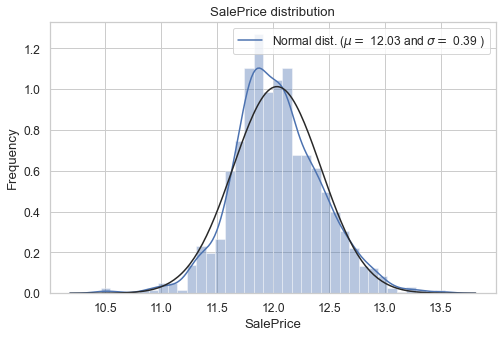

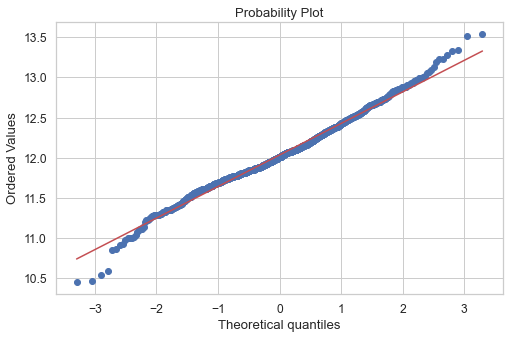

In [56]:
#We use the numpy function log to all elements of the column
df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(df_cleaned['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(df_cleaned['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

# Data Preprocessing - Manual Encoding few categorical variables

In [57]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df_cleaned['ExterQual'] = df_cleaned[['ExterQual']].apply(map_function)
df_cleaned['ExterCond'] = df_cleaned[['ExterCond']].apply(map_function)
df_cleaned['BsmtQual'] = df_cleaned[['BsmtQual']].apply(map_function)
df_cleaned['BsmtCond'] = df_cleaned[['BsmtCond']].apply(map_function)
df_cleaned['BsmtExposure'] = df_cleaned[['BsmtExposure']].apply(map_function1)
df_cleaned['BsmtFinType1'] = df_cleaned[['BsmtFinType1']].apply(map_function2)
df_cleaned['BsmtFinType2'] = df_cleaned[['BsmtFinType2']].apply(map_function2)
df_cleaned['HeatingQC'] = df_cleaned[['HeatingQC']].apply(map_function)
df_cleaned['CentralAir'] = df_cleaned[['CentralAir']].apply(map_function3)
df_cleaned['KitchenQual'] = df_cleaned[['KitchenQual']].apply(map_function)
df_cleaned['Functional'] = df_cleaned[['Functional']].apply(map_function4)
df_cleaned['GarageFinish'] = df_cleaned[['GarageFinish']].apply(map_function5)
df_cleaned['GarageQual'] = df_cleaned[['GarageQual']].apply(map_function)
df_cleaned['GarageCond'] = df_cleaned[['GarageCond']].apply(map_function)
df_cleaned['PavedDrive'] = df_cleaned[['PavedDrive']].apply(map_function6)

conveerting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [58]:
df_cleaned['MSSubClass']=df_cleaned['MSSubClass'].astype('object')

In [59]:
cat_feats  = df_cleaned.dtypes[df_cleaned.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [60]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
MSZoning,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


# Data Preprocessing - Dummy creation for remaining categorical variables

In [61]:
# Creating dummies
dummy = pd.get_dummies(df_cleaned[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
# Adding the results back to the cleaned dataframe
df_cleaned = pd.concat([df_cleaned, dummy], axis=1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [63]:
# Dropping the columns whose dummies have been created
df_cleaned=df_cleaned.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [64]:
df_cleaned.shape

(1412, 202)

In [65]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
RoofMatl_Roll,0,0.0
HouseStyle_SFoyer,0,0.0
HouseStyle_SLvl,0,0.0
RoofStyle_Gable,0,0.0
RoofStyle_Gambrel,0,0.0
RoofStyle_Hip,0,0.0
RoofStyle_Mansard,0,0.0
RoofStyle_Shed,0,0.0
RoofMatl_CompShg,0,0.0


# Data Modeling -Test Train spliting

In [66]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(df_cleaned, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 202)
(424, 202)


In [67]:
# display the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [68]:
# display the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [69]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [70]:
y_test=house_test.pop('SalePrice')
X_test=house_test

# Data Modeling - Scaling

Scaling the numerical variables

In [71]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [72]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [73]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [75]:
# verify the X_train to check if SalePrice column is removed
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [76]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

# Data Modeling - RFE Technique

RFE Recursive feature elimination

In [77]:
reg = LinearRegression()  # Instantiating
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
#Coefficients , intercepts

print(reg.coef_)
print(reg.intercept_)

[ 1.42001582e-01  5.69847617e-01  3.86575522e-01  2.21679566e-01
  3.44038916e-02  2.04997713e-02 -7.12494509e-02  2.85633361e-02
  1.31351358e-02  3.25323924e-02  2.29108367e-02 -2.58003688e+10
 -2.25706011e-02 -1.81439616e+10 -2.87546095e+10  3.80973957e+10
  3.63126186e-02  7.55606712e-02  3.24163664e+10  2.39927587e+10
  6.64593606e+09 -4.69165906e+10  8.16429640e-02  6.17068583e-03
  9.30186251e-02  6.17956236e-02 -5.58218725e-02 -1.19464111e-01
  4.51692499e-02  2.58794242e-02  1.26787561e-01  6.66055388e-02
  5.60609282e-03  2.31815875e-02  1.27685165e-01  8.80688354e-02
  2.18201986e-01 -6.52072708e-02 -7.64462645e-03  6.39572053e-02
  9.70461121e-03  1.48899025e-02  4.78269872e-02  9.19125300e-02
  9.55193852e-02 -1.17894050e-02 -4.96424723e-02 -7.33014330e-02
  2.43842079e-02 -3.32275550e-01 -1.51970649e-02 -4.25956414e-02
 -4.26835071e-02 -1.73919344e-01 -1.36595523e-01 -5.82700415e-02
 -2.83314807e+10 -5.35529603e-02 -1.40104486e-01 -1.15763731e-01
 -1.27961072e-01  5.22959

In [79]:
# Import RFE

from sklearn.feature_selection import RFE
reg = LinearRegression()   
rfe = RFE(reg, 90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False False  True False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True False  True False False False  True False
  True False False  True False False False  True False False  True False
 False  True False False False  True  True  True  True False  True  True
  True  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True False False False  True False False False False False  True  True
 False False False False  True False  True False False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
 False False  True False False  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False  True
 False False False False False False False False  T

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'GarageCars', 'GarageQual', 'WoodDeckSF', 'ScreenPorch', 'Age',
       'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRAe', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRA

In [81]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath',
       'BedroomAbvGr',
       ...
       'GarageType_BuiltIn', 'GarageType_Detchd', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=111)

In [82]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [83]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca
53,1.0,0.160959,0.228895,0.888889,0.500,0.5,0.863550,0.0,0.013699,0.561228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,1.0,0.212329,0.042628,0.555556,0.500,0.5,0.017176,0.0,0.503425,0.357674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,1.0,0.109589,0.012821,0.555556,0.625,0.5,0.266698,0.0,0.218322,0.311470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.5,0.581107,0.0,0.128425,0.456543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,1.0,0.154110,0.035631,0.444444,0.750,0.5,0.306775,0.0,0.156250,0.291761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:27:49   Log-Likelihood:                 846.24
No. Observations:                 988   AIC:                            -1524.
Df Residuals:                     904   BIC:                            -1113.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5201 

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.63
2,LotArea,2.01
3,OverallQual,3.69
4,OverallCond,1.82
5,ExterCond,1.43
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.

Though the accuracy the good it has many features and highly collinear.¶

In [86]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [87]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca
53,0.160959,0.228895,0.888889,0.500,0.50,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.50,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.50,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.50,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.50,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.50,0.374046,0.0,0.000000,0.219386,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.270548,0.041483,0.555556,0.500,0.50,0.233779,0.0,0.400257,0.426494,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,0.164384,0.029166,0.555556,0.625,0.50,0.368798,0.0,0.049229,0.252989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.037671,0.014957,0.555556,0.500,0.75,0.572996,0.0,0.015411,0.365751,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Modeling 

Ridge Regression model

Starting with Ridge Regression model

In [88]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9312095072260783


Perform the Cross score validation and we are using the different values of alpha and finding the optimal paramater

In [89]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.4}
-0.08376700786064187


In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005496,0.002070,0.002894,0.000896,0.0001,{'alpha': 0.0001},-0.091761,-0.087721,-0.085526,-0.076815,...,-0.085573,0.004896,16,-0.071260,-0.072786,-0.071858,-0.075760,-0.072639,-0.072861,0.001551
1,0.004025,0.000072,0.002802,0.000404,0.001,{'alpha': 0.001},-0.091744,-0.087709,-0.085528,-0.076796,...,-0.085559,0.004896,15,-0.071263,-0.072787,-0.071857,-0.075764,-0.072645,-0.072863,0.001552
2,0.004025,0.000635,0.002460,0.000533,0.01,{'alpha': 0.01},-0.091582,-0.087596,-0.085540,-0.076604,...,-0.085425,0.004911,14,-0.071294,-0.072791,-0.071857,-0.075807,-0.072705,-0.072891,0.001560
3,0.004029,0.000636,0.002503,0.000447,0.05,{'alpha': 0.05},-0.090962,-0.087186,-0.085542,-0.075715,...,-0.084926,0.005037,12,-0.071509,-0.072822,-0.071905,-0.075953,-0.072885,-0.073015,0.001561
4,0.004534,0.000705,0.001891,0.000485,0.1,{'alpha': 0.1},-0.090481,-0.086836,-0.085507,-0.074737,...,-0.084604,0.005262,11,-0.071736,-0.073009,-0.072028,-0.076181,-0.073095,-0.073210,0.001578
5,0.004799,0.000405,0.002998,0.000045,0.2,{'alpha': 0.2},-0.089874,-0.086406,-0.085716,-0.073226,...,-0.084183,0.005692,9,-0.072132,-0.073373,-0.072332,-0.076633,-0.073388,-0.073572,0.001616
6,0.004564,0.000539,0.002740,0.000404,0.3,{'alpha': 0.3},-0.089527,-0.086193,-0.085855,-0.072145,...,-0.083900,0.006041,5,-0.072487,-0.073700,-0.072654,-0.077082,-0.073694,-0.073923,0.001659
7,0.004588,0.000799,0.002828,0.000423,0.4,{'alpha': 0.4},-0.089292,-0.086167,-0.086053,-0.071531,...,-0.083767,0.006250,1,-0.072811,-0.073997,-0.072980,-0.077491,-0.073994,-0.074255,0.001692
8,0.004427,0.000591,0.002495,0.000444,0.5,{'alpha': 0.5},-0.089160,-0.086307,-0.086472,-0.071214,...,-0.083787,0.006395,2,-0.073141,-0.074293,-0.073300,-0.077882,-0.074269,-0.074577,0.001720
9,0.004015,0.000922,0.002297,0.000400,0.6,{'alpha': 0.6},-0.089086,-0.086424,-0.086867,-0.071044,...,-0.083833,0.006492,3,-0.073453,-0.074569,-0.073583,-0.078217,-0.074524,-0.074869,0.001736


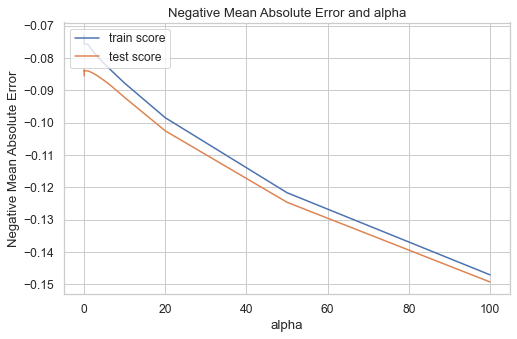

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

here We assume that alpha may be between 0- 30 So select the parameters according to this

In [93]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,30.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20.0, 30.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=30]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004459,0.000576,0.002102,0.000223,0.001,{'alpha': 0.001},-0.091744,-0.087709,-0.085528,-0.076796,...,-0.085559,0.004896,5,-0.071263,-0.072787,-0.071857,-0.075764,-0.072645,-0.072863,0.001552
1,0.003301,0.000748,0.001694,0.000403,0.01,{'alpha': 0.01},-0.091582,-0.087596,-0.085540,-0.076604,...,-0.085425,0.004911,4,-0.071294,-0.072791,-0.071857,-0.075807,-0.072705,-0.072891,0.001560
2,0.003418,0.000458,0.001961,0.000581,1.0,{'alpha': 1.0},-0.088978,-0.086797,-0.088161,-0.070630,...,-0.084032,0.006800,1,-0.074456,-0.075520,-0.074496,-0.079339,-0.075501,-0.075862,0.001799
3,0.003191,0.000399,0.001795,0.000399,2.0,{'alpha': 2.0},-0.089609,-0.087527,-0.090203,-0.070257,...,-0.084582,0.007366,2,-0.076313,-0.077265,-0.076200,-0.081178,-0.077345,-0.077660,0.001821
4,0.003148,0.000311,0.001733,0.000427,3.0,{'alpha': 3.0},-0.090539,-0.088777,-0.091623,-0.070374,...,-0.085306,0.007776,3,-0.077895,-0.078663,-0.077698,-0.082500,-0.078865,-0.079124,0.001745
5,0.003989,0.000631,0.002194,0.000398,4.0,{'alpha': 4.0},-0.091624,-0.090026,-0.092672,-0.070967,...,-0.086148,0.007982,6,-0.079322,-0.080003,-0.079069,-0.083814,-0.080308,-0.080503,0.001715
6,0.003818,0.000216,0.002197,0.000400,5.0,{'alpha': 5.0},-0.092783,-0.091175,-0.093528,-0.071718,...,-0.087030,0.008101,7,-0.080669,-0.081244,-0.080386,-0.085045,-0.081658,-0.081801,0.001682
7,0.003725,0.000374,0.002195,0.000399,6.0,{'alpha': 6.0},-0.094145,-0.092358,-0.094385,-0.072410,...,-0.087988,0.008276,8,-0.081946,-0.082377,-0.081671,-0.086245,-0.082957,-0.083039,0.001661
8,0.004289,0.000398,0.002179,0.000498,7.0,{'alpha': 7.0},-0.095602,-0.093484,-0.095221,-0.073343,...,-0.089008,0.008368,9,-0.083190,-0.083494,-0.082918,-0.087431,-0.084231,-0.084253,0.001648
9,0.004325,0.000788,0.002227,0.000450,8.0,{'alpha': 8.0},-0.096976,-0.094646,-0.095995,-0.074380,...,-0.090061,0.008402,10,-0.084421,-0.084582,-0.084149,-0.088572,-0.085473,-0.085439,0.001628


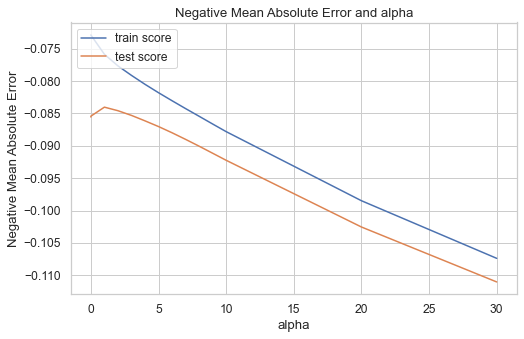

In [95]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

here the optimal alpha value is between 0-100 from the graph

In [96]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


Building ridge regression model with optimal alpha value

In [97]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [98]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [99]:
#selecting the top 30 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(30)

,Features,Coefficient,Mod
0,LotFrontage,10.287494,10.287494
3,OverallCond,0.524799,0.524799
14,BsmtUnfSF,0.375268,0.375268
2,OverallQual,0.367900,0.367900
34,GarageCars,0.324864,0.324864
11,BsmtFinSF1,0.321132,0.321132
9,BsmtExposure,0.314710,0.314710
12,BsmtFinType2,0.296360,0.296360
74,LotConfig_FR2,-0.295952,0.295952
6,ExterCond,0.266910,0.266910


In [100]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9264
Ridge regression test r2:  0.746


Lasso Regression model

In [101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041497,0.003616,0.002428,0.000466,0.0001,{'alpha': 0.0001},-0.088534,-0.086673,-0.086133,-0.073623,...,-0.084330,0.005415,1,-0.073562,-0.074830,-0.073612,-0.078299,-0.074465,-0.074953,0.001742
1,0.006785,0.000751,0.002387,0.000480,0.001,{'alpha': 0.001},-0.089985,-0.091229,-0.094933,-0.076000,...,-0.088338,0.006454,2,-0.083650,-0.084155,-0.082879,-0.088222,-0.083848,-0.084551,0.001883
2,0.003590,0.000798,0.002318,0.000414,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.004551,0.000388,0.002683,0.000511,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.004594,0.000505,0.002231,0.000469,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


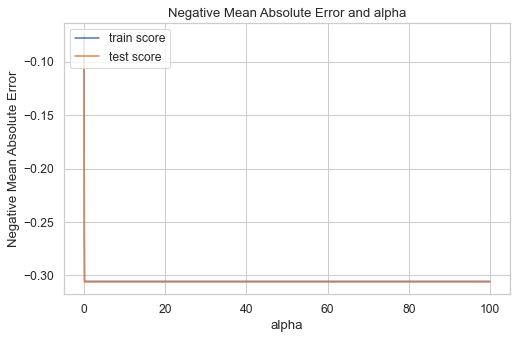

In [103]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

graph shows that the alpha value might be very less than 1

In [104]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007537,0.000561,0.002484,0.000431,0.001,{'alpha': 0.001},-0.089985,-0.091229,-0.094933,-0.076000,...,-0.088338,0.006454,1,-0.083650,-0.084155,-0.082879,-0.088222,-0.083848,-0.084551,0.001883
1,0.004987,0.000632,0.002465,0.000451,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,2,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
2,0.003975,0.000764,0.002743,0.000499,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,3,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
3,0.003947,0.000086,0.001780,0.000394,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029
4,0.004897,0.000659,0.002484,0.000445,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


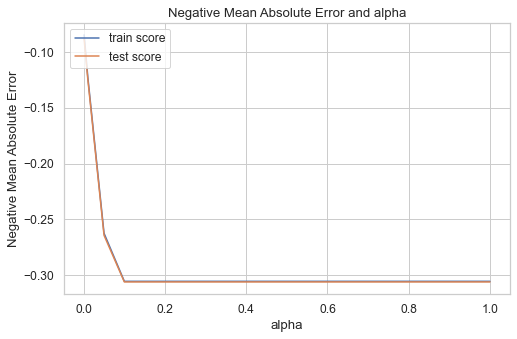

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

now iam going to Tunning it more constantly


In [108]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041767,0.003663,0.002394,0.000489,0.0001,{'alpha': 0.0001},-0.088534,-0.086673,-0.086133,-0.073623,...,-0.084330,0.005415,1,-0.073562,-0.074830,-0.073612,-0.078299,-0.074465,-0.074953,0.001742
1,0.006712,0.000738,0.002107,0.000225,0.001,{'alpha': 0.001},-0.089985,-0.091229,-0.094933,-0.076000,...,-0.088338,0.006454,2,-0.083650,-0.084155,-0.082879,-0.088222,-0.083848,-0.084551,0.001883
2,0.003743,0.000314,0.001746,0.000387,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.003428,0.000463,0.001957,0.000075,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.003730,0.000624,0.002094,0.000265,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


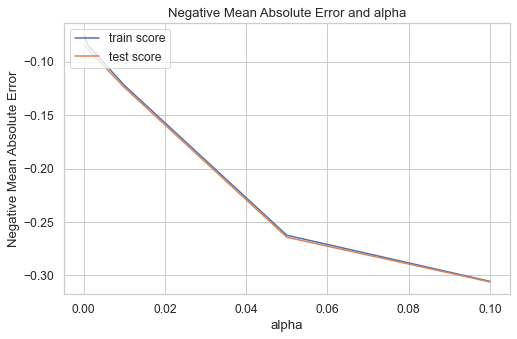

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [111]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043023,0.002875,0.002194,0.000399,0.00001,{'alpha': 1e-05},-0.091758,-0.087155,-0.085570,-0.076552,...,-0.085331,0.004936,2,-0.071429,-0.072810,-0.071886,-0.075966,-0.072787,-0.072976,0.001587
1,0.050930,0.006965,0.004281,0.002387,0.0001,{'alpha': 0.0001},-0.088534,-0.086673,-0.086133,-0.073623,...,-0.084330,0.005415,1,-0.073562,-0.074830,-0.073612,-0.078299,-0.074465,-0.074953,0.001742
2,0.008083,0.001025,0.002563,0.000477,0.001,{'alpha': 0.001},-0.089985,-0.091229,-0.094933,-0.076000,...,-0.088338,0.006454,3,-0.083650,-0.084155,-0.082879,-0.088222,-0.083848,-0.084551,0.001883
3,0.005034,0.000637,0.002897,0.000469,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,4,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
4,0.004394,0.001026,0.002397,0.000511,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,5,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556


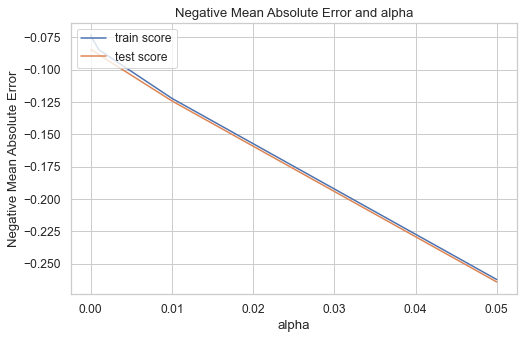

In [113]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [115]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045263,0.005427,0.001983,0.000631,0.00001,{'alpha': 1e-05},-0.091758,-0.087155,-0.085570,-0.076552,...,-0.085331,0.004936,2,-0.071429,-0.072810,-0.071886,-0.075966,-0.072787,-0.072976,0.001587
1,0.067429,0.017516,0.004127,0.001539,0.0001,{'alpha': 0.0001},-0.088534,-0.086673,-0.086133,-0.073623,...,-0.084330,0.005415,1,-0.073562,-0.074830,-0.073612,-0.078299,-0.074465,-0.074953,0.001742
2,0.008399,0.001010,0.002612,0.000428,0.001,{'alpha': 0.001},-0.089985,-0.091229,-0.094933,-0.076000,...,-0.088338,0.006454,3,-0.083650,-0.084155,-0.082879,-0.088222,-0.083848,-0.084551,0.001883


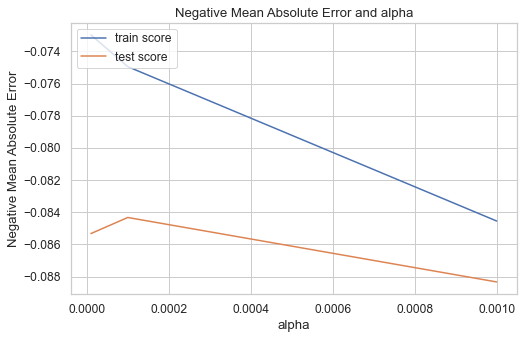

In [117]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

# Building Lasso regression model with optimal alpha value

In [119]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9277613651292376
Lasso Regression test r2: 0.7393071966767657


In [120]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [121]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.200424,10.200424
1,LotArea,0.136017,0.136017
2,OverallQual,0.535617,0.535617
3,OverallCond,0.564186,0.564186
4,ExterCond,0.137295,0.137295
5,BsmtFinSF1,-0.053226,0.053226
6,BsmtFinSF2,0.162205,0.162205
7,BsmtUnfSF,0.008597,0.008597
8,TotalBsmtSF,-0.000000,0.000000
9,CentralAir,0.494501,0.494501


In [122]:
#selecting the top 30 variables
lasso_coef.sort_values(by='mod',ascending=False).head(30)

,Feature,Coef,mod
0,LotFrontage,10.200424,10.200424
14,BsmtFullBath,0.793095,0.793095
3,OverallCond,0.564186,0.564186
2,OverallQual,0.535617,0.535617
74,Exterior2nd_Brk Cmn,-0.533572,0.533572
9,CentralAir,0.494501,0.494501
34,MSZoning_RH,0.413875,0.413875
36,MSZoning_RM,0.331519,0.331519
37,Street_Pave,0.285879,0.285879
22,WoodDeckSF,0.250246,0.250246


In [123]:
lasso.coef_

array([ 0.13601741,  0.53561677,  0.56418583,  0.13729502, -0.05322639,
        0.16220466,  0.00859715, -0.        ,  0.49450063,  0.09251315,
        0.03383311,  0.09908213, -0.02834779,  0.79309501,  0.0784325 ,
        0.10010275,  0.07218402, -0.11884546,  0.07653602,  0.16154482,
        0.24061134,  0.25024585,  0.08190041,  0.065596  , -0.11506163,
       -0.0469746 , -0.05331008, -0.03124746,  0.        , -0.05729308,
       -0.11428568, -0.02141869, -0.0360169 ,  0.41387462,  0.23255858,
        0.33151876,  0.2858788 ,  0.06826937, -0.02706373, -0.0813678 ,
       -0.07368386,  0.12163198, -0.09065367,  0.06753816, -0.07603245,
        0.10568533,  0.08571142, -0.1003384 ,  0.04838968,  0.0317096 ,
        0.03370115,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.00316288,  0.07489676,  0.06230941,
        0.02862411,  0.0569128 , -0.08070071, -0.00766433, -0.07178655,
       -0.07357725,  0.0086847 ,  0.16692086,  0.        , -0.  

Observation:

Lasso Regression is  simple model with most of the coefficients as zero values.
Lasso Regression has helped to me in the feature selection.


Text(0, 0.5, 'Sales Price')

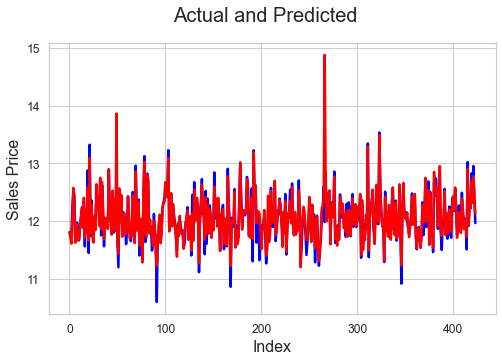

In [124]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

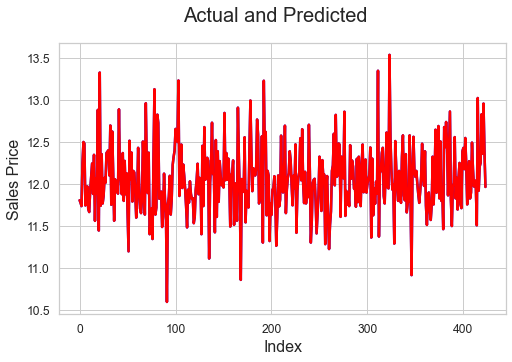

In [125]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

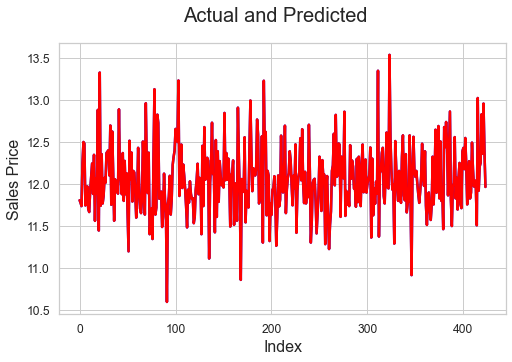

In [126]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

# Data Modeling and evaluation - Final model

We will use  Lasso Regression model because it is using less numbers of variables and it gives  almost the same accuracy. Lasso Regression model is more efficient  than the Ridge regression model

In [127]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9277613651292376
0.7393071966767657


Best alpha value for Lasso : {'alpha': 0.0001}
Best alpha value for Ridge : {'alpha': 1.0}

# Model Inference and Conclusion 


After compairing both the model we can see that the below Features(variables) are best explaining the DataSet

LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

BsmtFullBath : : If the BsmtFullBath area is more the SalePrice is higher

Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

MSZoning_RH : If the house i near residential area then the SalePrice is higher

Overall quality: If the Overall Condition is Excellent the SalePrice is higher

Exterior1st_CBlock : IF the house Exterior1st is CBlock then price is less.

Garage Area: If the Garage area is high the SalePrice is higher

CentralAir: If the CentralAir is Yes the SalePrice is higher

These features(variables) tell about the linear relation with respect to the price by which the company can improve their sales. For instance they can concentrate in invseting properties wich may have high SalePrice in the future

# Optimal value of alpha:

1)For Ridge regression :1.0
2)For Lasso Regression :0.0001